In [202]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import re
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
def res(obj):
    non_decimal = re.compile(r'[^\d.]+')
    return float(non_decimal.sub('', obj))

In [3]:
def df_preprocess(df):
    df[' power.draw [W]'] = df[' power.draw [W]'].apply(lambda x: res(x))
    df[' utilization.gpu [%]'] = df[' utilization.gpu [%]'].apply(lambda x : res(x))
    df[' clocks.current.sm [MHz]'] = df[' clocks.current.sm [MHz]'].apply(lambda x : res(x))
    df[' memory.used [MiB]'] = df[' memory.used [MiB]'].apply(lambda x : res(x))
    t0 = df[' timestamp'][0]
    tm = df[' timestamp']
    t = [int((x-t0).total_seconds()) for x in tm]
    df = df.assign(timestep = t) 
    return df 

In [230]:
vox_urban = pd.read_csv('/mnt/storage/home/ja17618/vox_urbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
vox_urban = df_preprocess(vox_urban)
print(vox_urban.shape[0])
vox_nurban = pd.read_csv('/mnt/storage/home/ja17618/vox_nurbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
vox_nurban = df_preprocess(vox_nurban)
print(vox_nurban.shape[0])

avod_urban = pd.read_csv('/mnt/storage/home/ja17618/avod_urbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
avod_urban = df_preprocess(avod_urban)
print(avod_urban.shape[0])

avod_nurban = pd.read_csv('/mnt/storage/home/ja17618/avod_nurbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
avod_nurban = df_preprocess(avod_nurban)
print(avod_nurban.shape[0])

# voxcnt = min(vox_urban.shape[0],vox_nurban.shape[0])
# avodcnt = min(avod_urban.shape[0],avod_nurban.shape[0])

# # print(urban_df.shape[0])
# vox_nurban = vox_nurban[:voxcnt]
# vox_urban = vox_urban[:voxcnt]

# avod_nurban = avod_nurban[:avodcnt]
# avod_urban = avod_urban[:avodcnt]

450
430
525
555


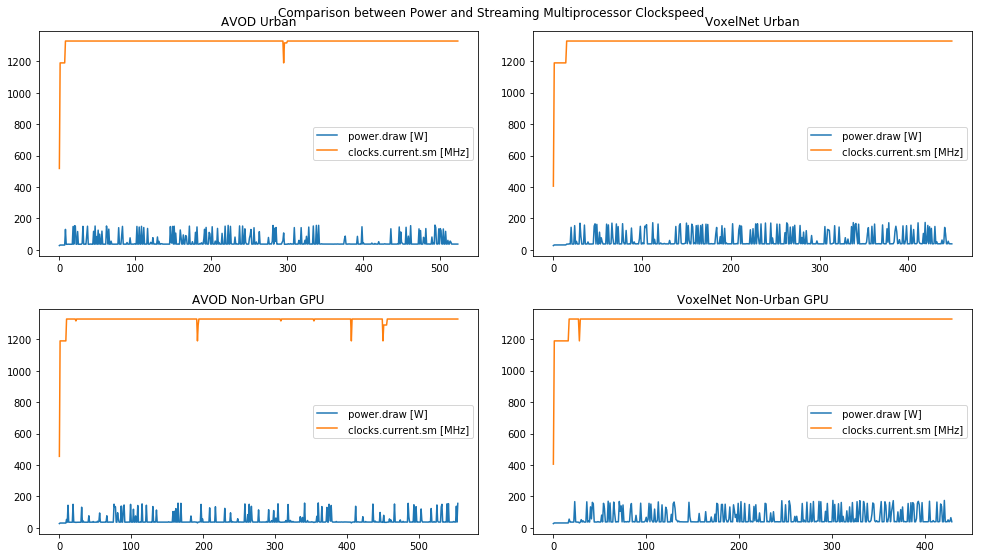

In [270]:

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14, 8))
fig.suptitle("Comparison between Power and Streaming Multiprocessor Clockspeed")

avod_urban.plot(y =[' power.draw [W]',' clocks.current.sm [MHz]'],ax=axes[0,0],title='AVOD Urban')
vox_urban.plot(y =[' power.draw [W]',' clocks.current.sm [MHz]'],ax=axes[0,1],title='VoxelNet Urban')

avod_nurban.plot(y =[' power.draw [W]',' clocks.current.sm [MHz]'],ax=axes[1,0],title='AVOD Non-Urban GPU')
vox_nurban.plot(y =[' power.draw [W]',' clocks.current.sm [MHz]'],ax=axes[1,1],title='VoxelNet Non-Urban GPU')
fig.tight_layout(pad=2)


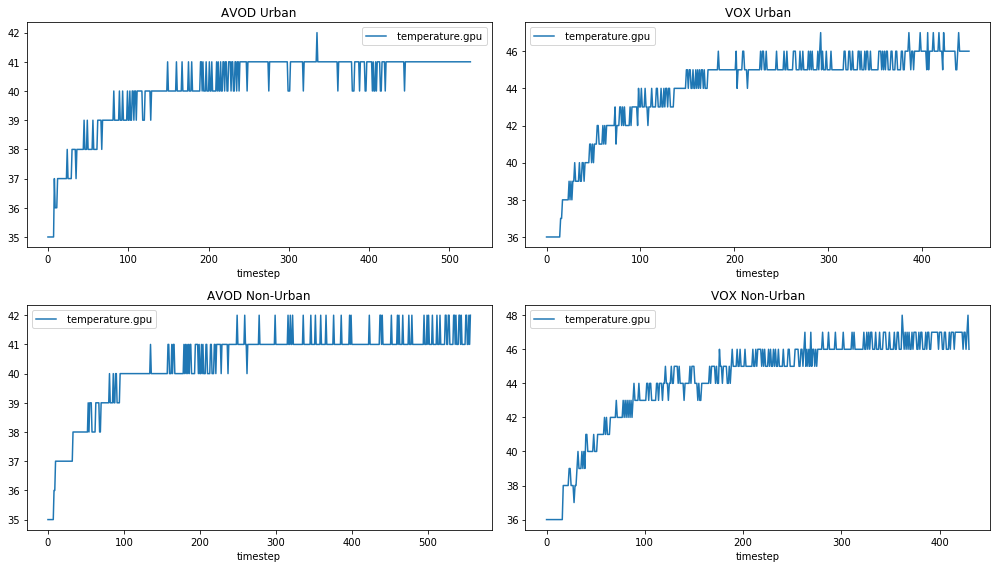

In [256]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14, 8))

avod_urban.plot(x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[0,0], title='AVOD Urban')
vox_urban.plot(x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[0,1],title='VOX Urban')


avod_nurban.plot(x = 'timestep', y =' temperature.gpu',kind='line',ax=axes[1,0], title='AVOD Non-Urban')
vox_nurban.plot( x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[1,1],title='VOX Non-Urban')
fig.tight_layout()
# fig, ax1 = plt.subplots(figsize=(10, 6))
# plt.violinplot([avod_urban[' temperature.gpu'],vox_urban[' temperature.gpu']],showmeans=True  )
# plt.figure()
# plt.violinplot([avod_nurban[' temperature.gpu'],vox_nurban[' temperature.gpu']],showmeans=True )

# plt.figure()
# plt.boxplot([urban_df[' power.draw [W]'],nurban_df[' power.draw [W]']])

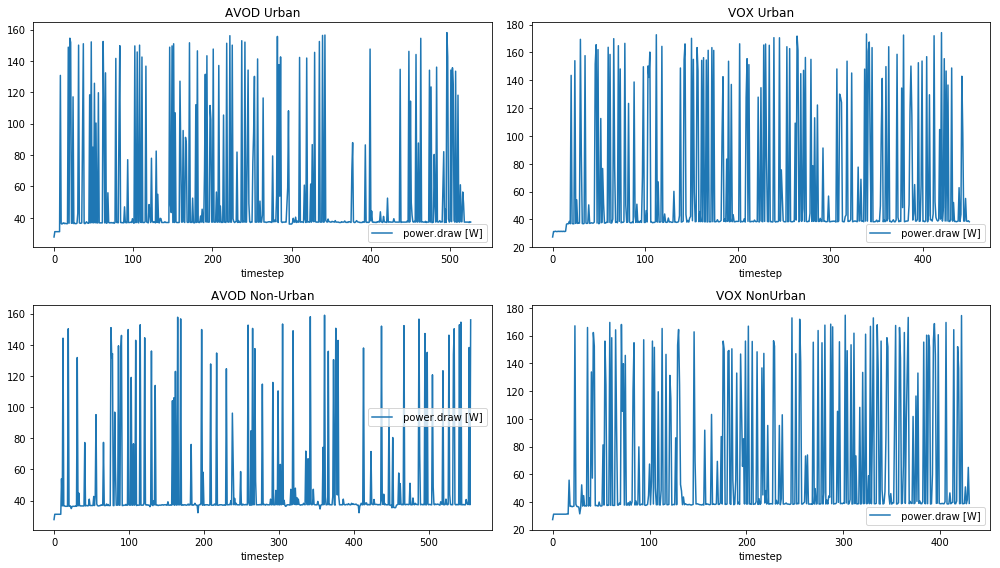

In [257]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14, 8))

avod_urban.plot(x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[0,0], title='AVOD Urban')
vox_urban.plot(x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[0,1],title='VOX Urban')


avod_nurban.plot(x = 'timestep', y =' power.draw [W]',kind='line',ax=axes[1,0], title='AVOD Non-Urban')
vox_nurban.plot( x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[1,1],title='VOX NonUrban')
fig.tight_layout()

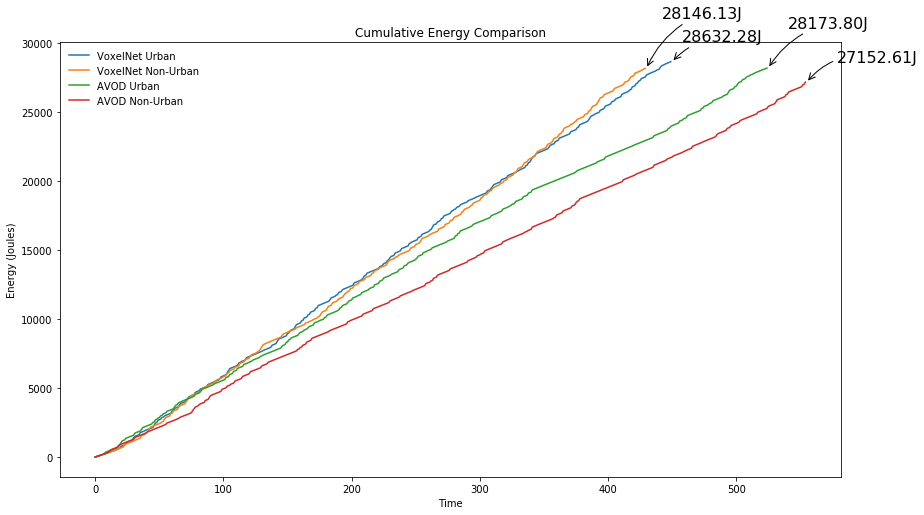

In [259]:
plt.figure(2,figsize=(14,8))
vu = vox_urban[' power.draw [W]'].cumsum()
a = vu.shape[0]
am = "{0:.2f}".format(vu.max())
aml = vu.max()


vnu = vox_nurban[' power.draw [W]'].cumsum()
b = vnu.shape[0]
aml = vu.max()
bm = "{0:.2f}".format(vnu.max())
bml = vnu.max()

avu= avod_urban[' power.draw [W]'].cumsum()
c = avu.shape[0]
aml = vu.max()
cm = "{0:.2f}".format(avu.max())
cml = avu.max()

avnu = avod_nurban[' power.draw [W]'].cumsum()
d = avnu.shape[0]
dm = "{0:.2f}".format(avnu.max())
dml = avnu.max()

plt.plot(vu,label='VoxelNet Urban')
plt.annotate(str(am)+'J',
             xy=(a, aml), xycoords='data',
             xytext=(+10, +20), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(vnu,label='VoxelNet Non-Urban')
plt.annotate(str(bm)+'J',
             xy=(b, bml), xycoords='data',
             xytext=(+15, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(avu,label='AVOD Urban')
plt.annotate(str(cm)+'J',
             xy=(c, cml), xycoords='data',
             xytext=(+20, +40), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(avnu,label='AVOD Non-Urban')
plt.annotate(str(dm)+'J',
             xy=(d, dml), xycoords='data',
             xytext=(+30, +20), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"))



plt.legend(loc='upper left', frameon=False)
plt.ylabel('Energy (Joules)')
plt.xlabel('Time')
plt.title("Cumulative Energy Comparison")
plt.savefig('energycomp.png',dpi=300)

In [188]:
vu.max()

28632.279999999977

In [159]:
avod_urban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,525.0,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,1.0,53.664381,12.710476,1324.247619,40.148571,5545.424762,262.601905
std,0.0,35.425748,17.082310,39.167184,1.287351,641.013502,152.238136
min,1.0,27.800000,0.000000,518.000000,35.000000,0.000000,0.000000
25%,1.0,37.040000,0.000000,1328.000000,40.000000,5625.000000,131.000000
50%,1.0,37.290000,0.000000,1328.000000,41.000000,5625.000000,263.000000
75%,1.0,39.450000,31.000000,1328.000000,41.000000,5625.000000,394.000000
max,1.0,158.050000,99.000000,1328.000000,42.000000,5625.000000,526.000000


In [160]:
vox_urban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,450.0,450.000000,450.000000,450.000000,450.000000,450.00000,450.000000
mean,1.0,63.627289,23.666667,1321.624444,43.982222,8936.86000,224.948889
std,0.0,46.000155,25.133940,49.589215,2.476553,1482.82627,130.477279
min,1.0,27.290000,0.000000,405.000000,36.000000,0.00000,0.000000
25%,1.0,38.240000,0.000000,1328.000000,43.000000,9209.00000,112.250000
50%,1.0,38.510000,14.000000,1328.000000,45.000000,9209.00000,224.500000
75%,1.0,58.877500,50.750000,1328.000000,45.000000,9209.00000,337.750000
max,1.0,174.290000,63.000000,1328.000000,47.000000,9209.00000,450.000000


In [161]:
avod_nurban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,555.0,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,1.0,48.923622,13.974775,1322.945946,40.356757,5028.486486,277.697297
std,0.0,31.208623,17.482722,42.249482,1.345780,625.221172,160.977705
min,1.0,27.780000,0.000000,455.000000,35.000000,0.000000,0.000000
25%,1.0,37.040000,0.000000,1328.000000,40.000000,5113.000000,138.500000
50%,1.0,37.290000,0.000000,1328.000000,41.000000,5113.000000,278.000000
75%,1.0,37.750000,34.000000,1328.000000,41.000000,5113.000000,416.500000
max,1.0,159.010000,99.000000,1328.000000,42.000000,5113.000000,556.000000


In [162]:
vox_nurban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,1.0,65.456116,24.995349,1320.358140,44.269767,8864.058140,214.932558
std,0.0,46.638964,24.510404,51.893625,2.774638,1706.976102,124.700453
min,1.0,27.290000,0.000000,405.000000,36.000000,0.000000,0.000000
25%,1.0,38.260000,0.000000,1328.000000,43.000000,9209.000000,107.250000
50%,1.0,38.750000,20.500000,1328.000000,45.000000,9209.000000,214.500000
75%,1.0,73.727500,50.000000,1328.000000,46.000000,9209.000000,322.750000
max,1.0,174.690000,70.000000,1328.000000,48.000000,9209.000000,430.000000


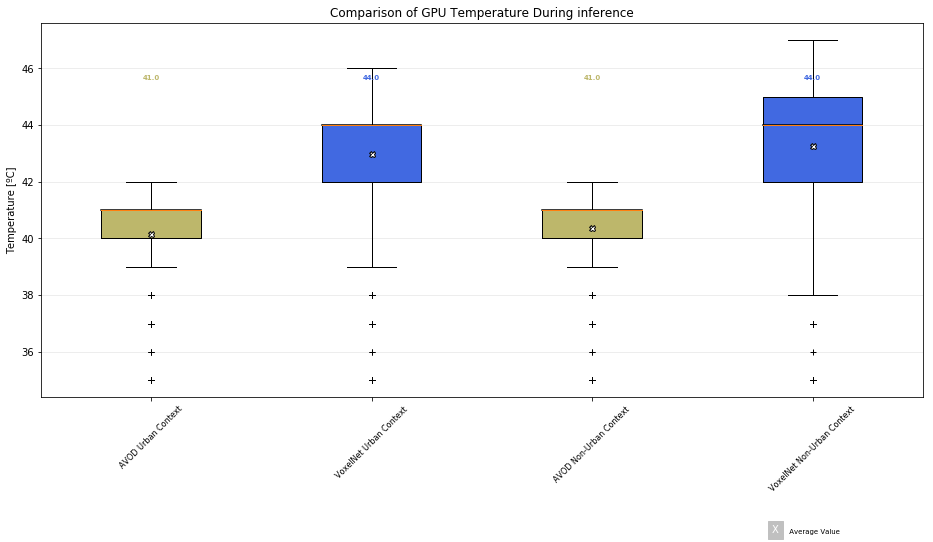

In [267]:

data = [avod_urban[' temperature.gpu'],vox_urban[' temperature.gpu']-1,avod_nurban[' temperature.gpu'],vox_nurban[' temperature.gpu']-1]
dists = ['AVOD Urban Context', 'VoxelNet Urban Context','AVOD Non-Urban Context','VoxelNet Non-Urban Context']
fig, ax1 = plt.subplots(figsize=(14, 8))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
numDists = 2
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of GPU Temperature During inference')
ax1.set_ylabel('Temperature [ºC]')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='X', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=48
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', 
             size='x-small', weight=weights[k],
             color=boxColors[k])


# Finally, add a basic legend
# plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
#             backgroundcolor=boxColors[0], color='black', weight='roman',
#             size='x-small')

plt.figtext(0.80, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='x-small')
plt.savefig('gputempbox.png',dpi=300)
plt.show()

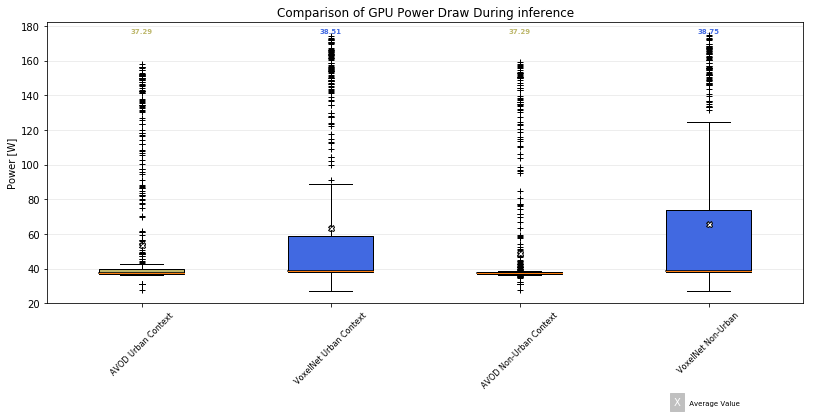

In [268]:
data = [avod_urban[' power.draw [W]'],vox_urban[' power.draw [W]'],avod_nurban[' power.draw [W]'],vox_nurban[' power.draw [W]']]
dists = ['AVOD Urban Context', 'VoxelNet Urban Context','AVOD Non-Urban Context','VoxelNet Non-Urban']
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
numDists = 2
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of GPU Power Draw During inference')
ax1.set_ylabel('Power [W]')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='X', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=185
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

# Finally, add a basic legend
# plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
#             backgroundcolor=boxColors[0], color='black', weight='roman',
#             size='x-small')

plt.figtext(0.80, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='x-small')
plt.savefig('gpupowerbox.png',dpi=300)
plt.show()